<a href="https://colab.research.google.com/github/2303A52381/23CSBTB39-40/blob/main/AIML_ASSIGNMENT_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of Rows: 545
Number of Columns: 13
price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
90%    7.350000e+06   

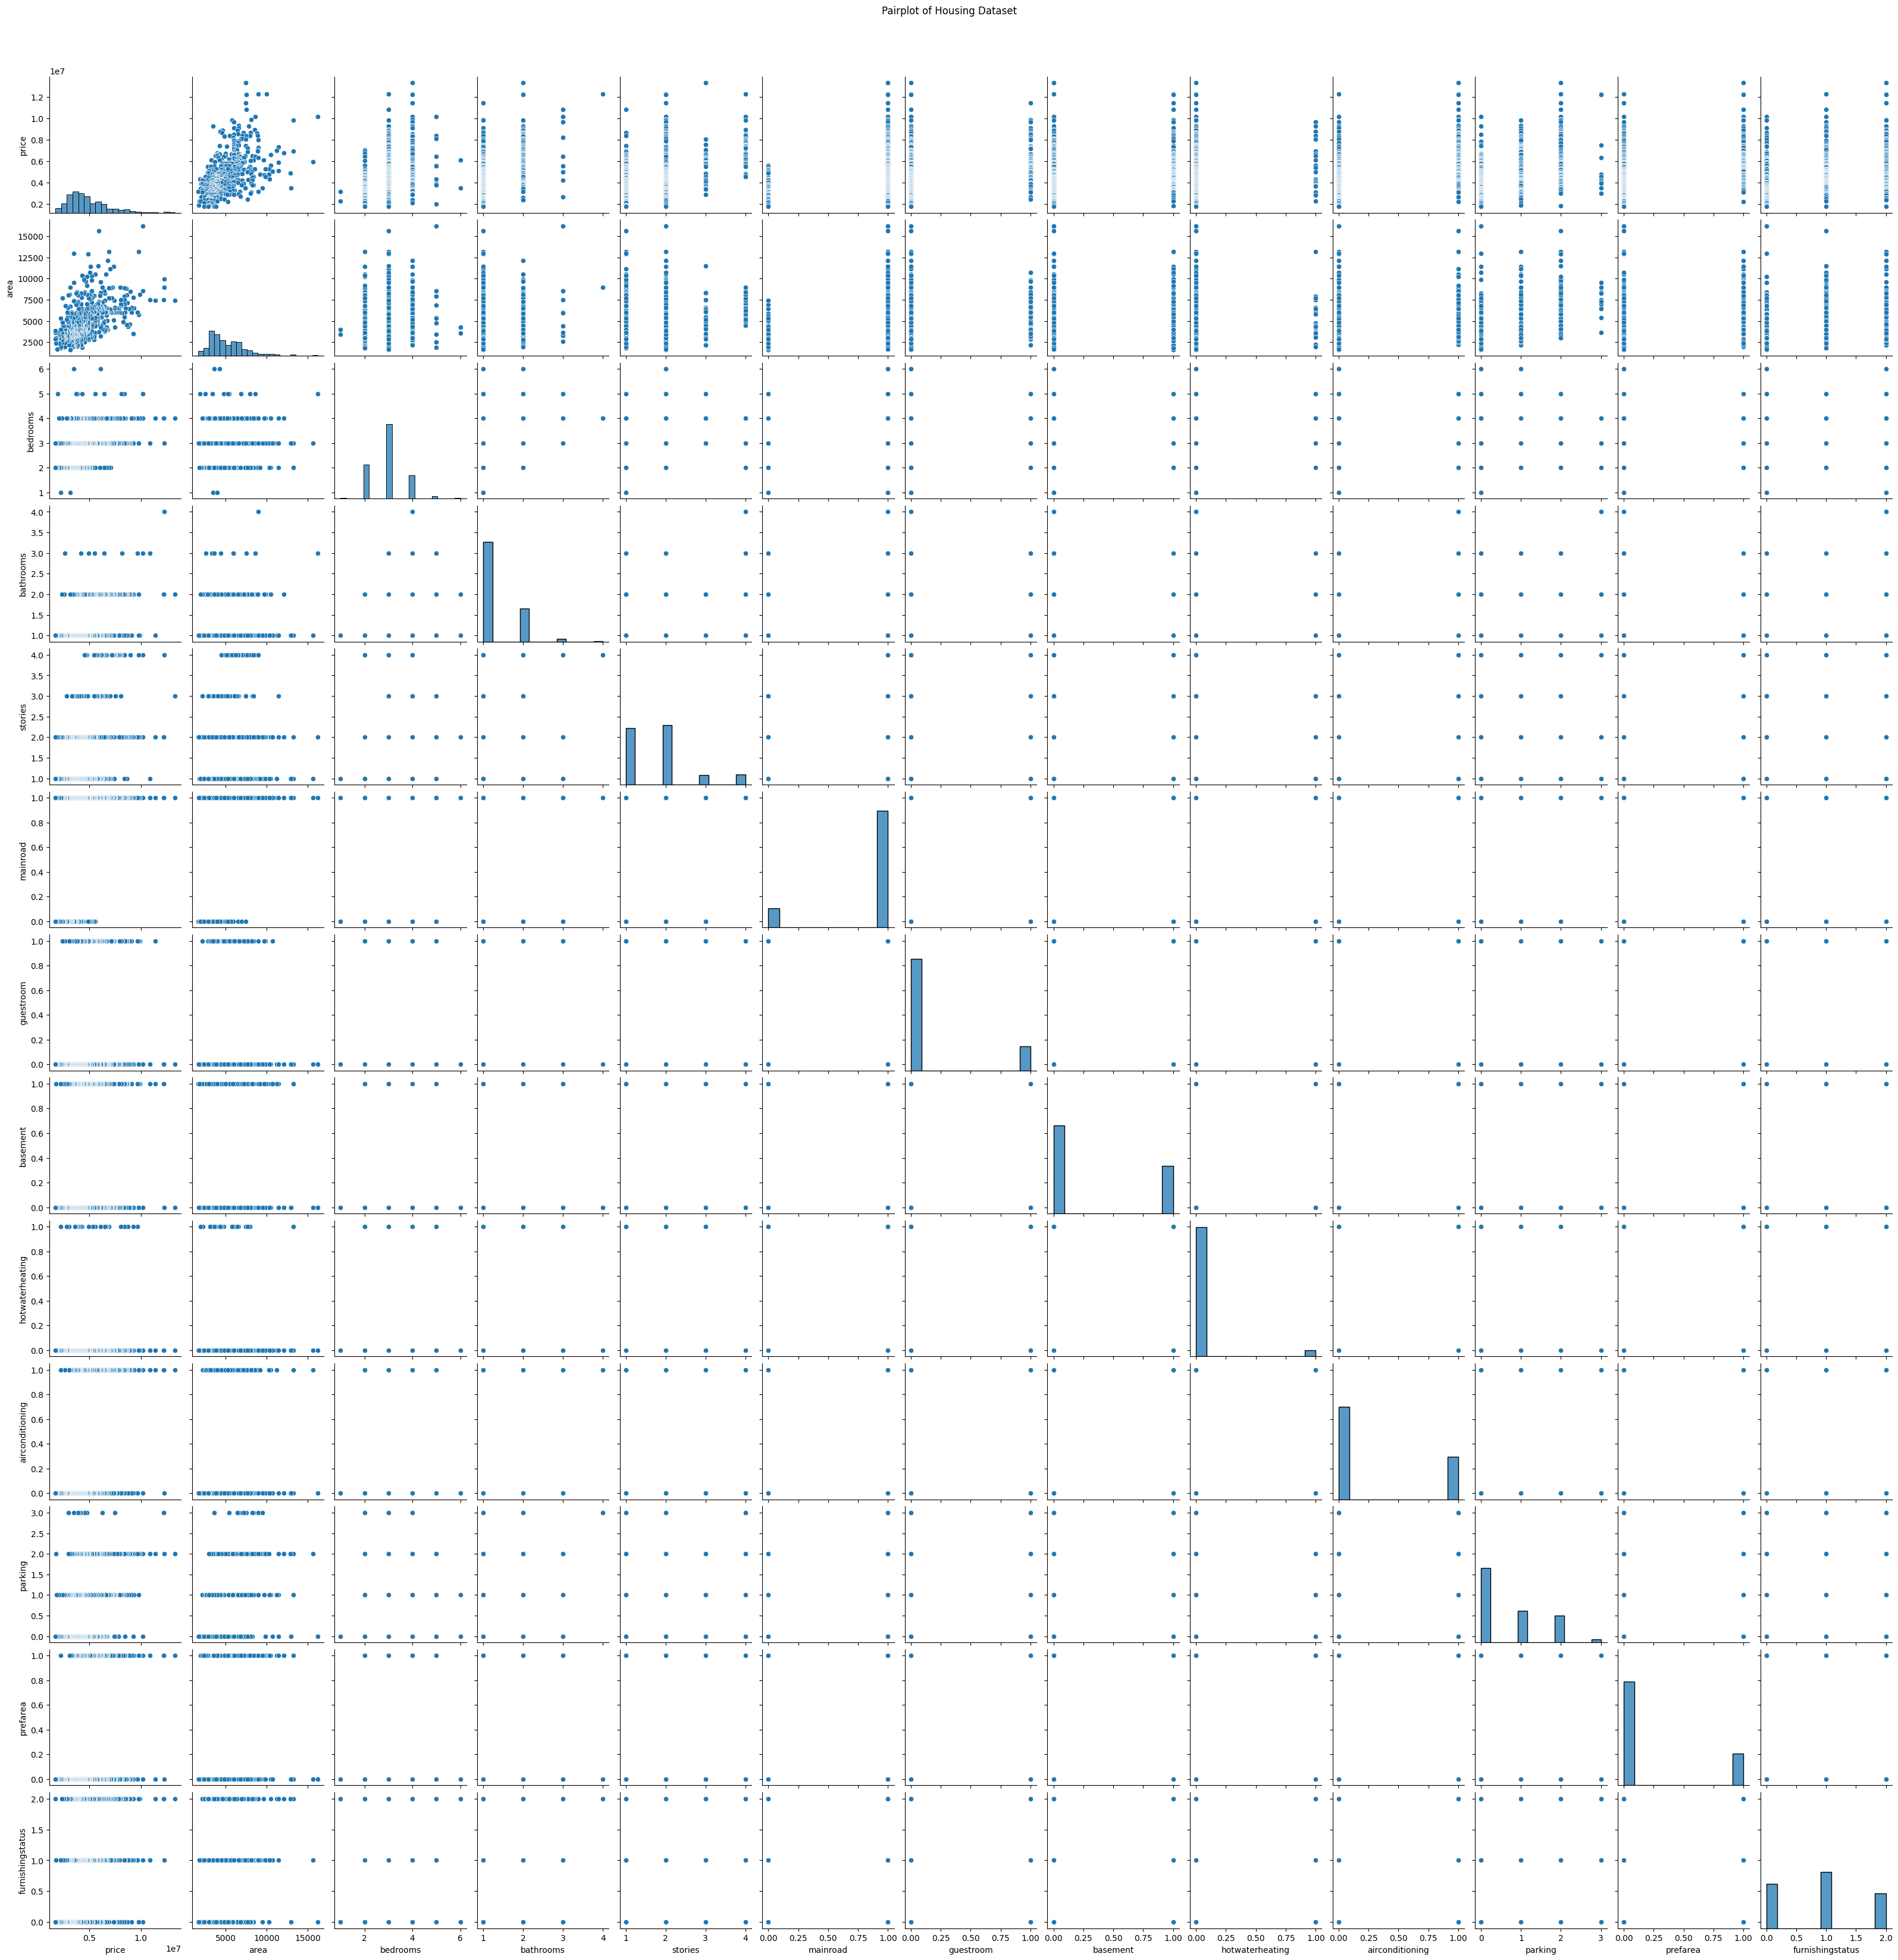

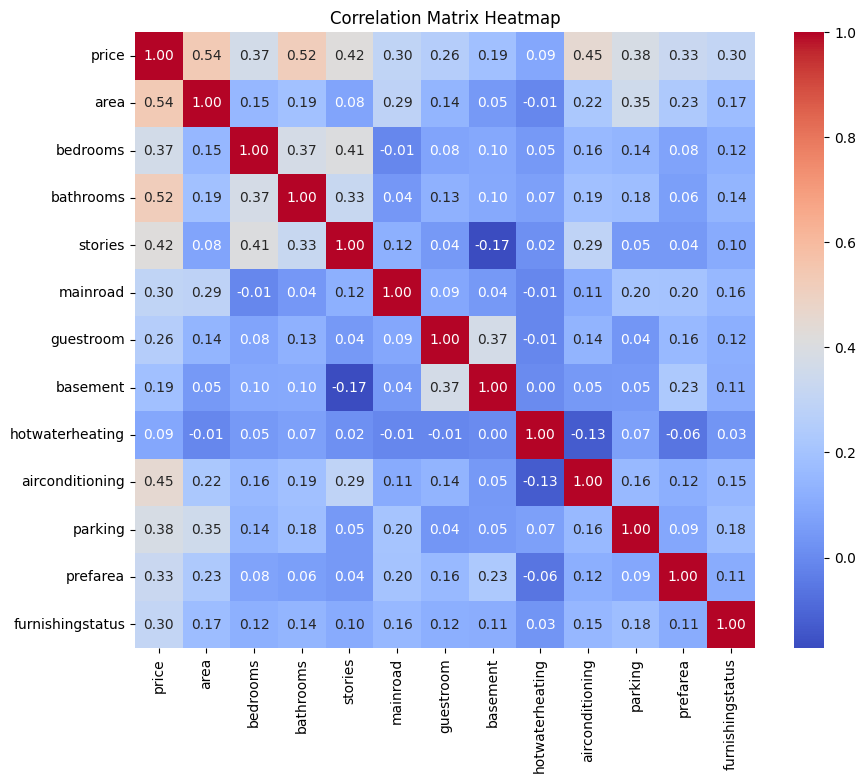

Intercept: -17122.995142479427
Coefficients: [3.29285878e+02 1.61077479e+05 1.19412059e+06 4.72530548e+05
 3.95480372e+05]
CDF of predictions (first 10): [ 6298756.24846019 12711056.72127601 16013054.76875002 20264775.28519366
 23701507.94102649 28047069.61904212 33776306.61982834 39379932.34812722
 42813982.06506232 45835814.51511605]


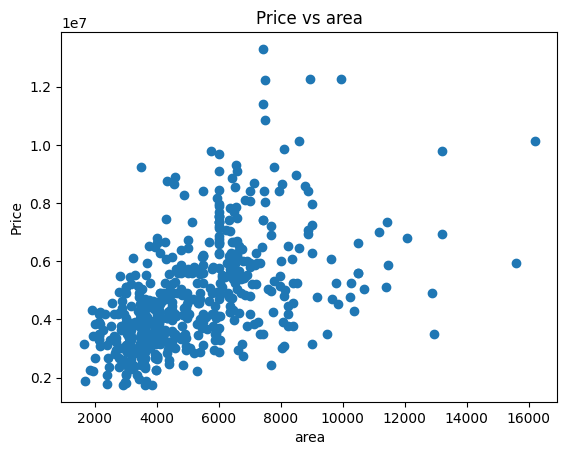

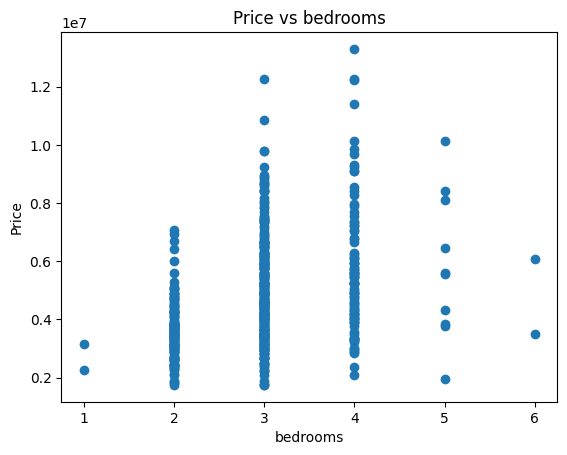

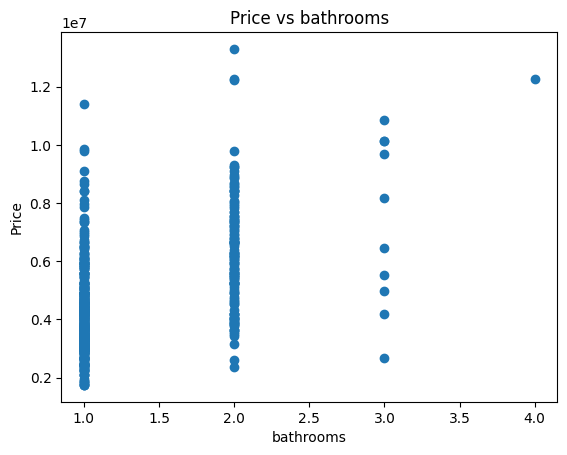

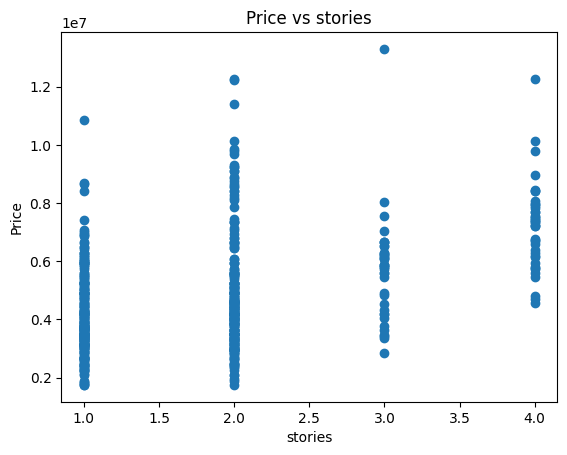

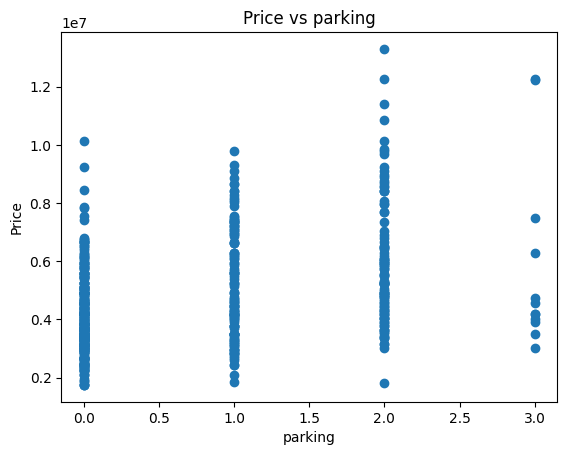

R^2 Score: 0.5253182966980272


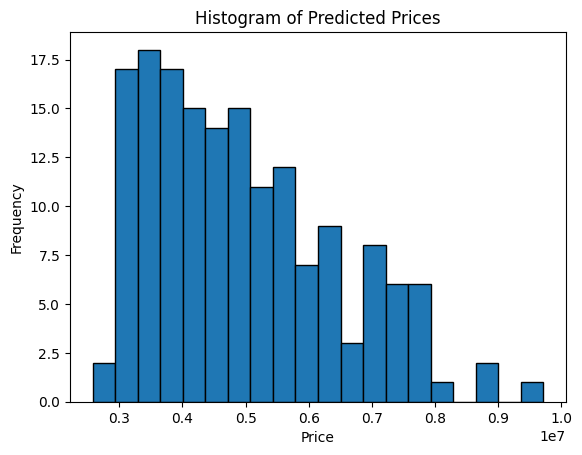

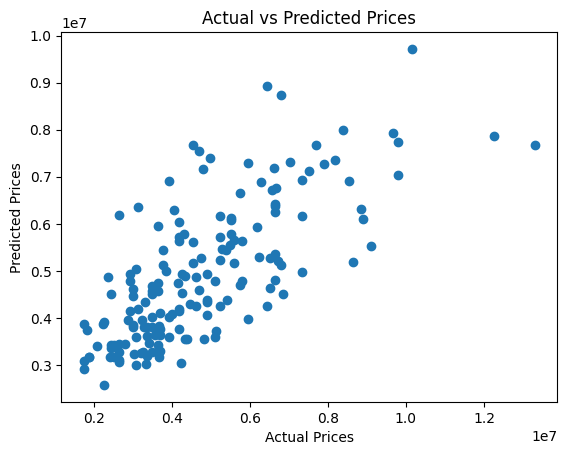

MAE: 1065137.8263727794
SSE: 335243078957053.0
RMSE: 1429743.0243200304
R^2 Score: 0.5253182966980272
Normalized Observed Prices (first 10): [0.2        0.42424242 0.16969697 0.40606061 0.09090909 0.27272727
 0.3030303  0.24181818 0.06060606 0.13878788]
Normalized Expected Prices (first 10): [0.52138452 0.53728785 0.10165006 0.23467088 0.12052137 0.24781454
 0.44161604 0.42402256 0.12014559 0.06240927]


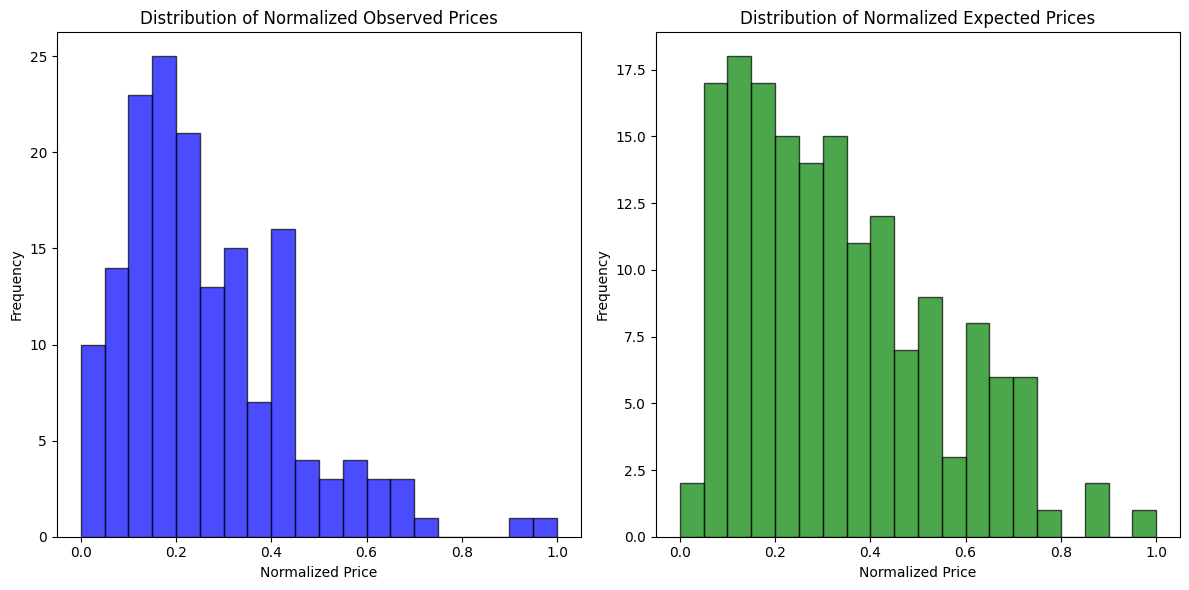

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()
housing.tail()
rows = len(housing.axes[0])
cols = len(housing.axes[1])
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
file_path = 'Housing.csv'
housing_df = pd.read_csv(file_path)
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_df[categorical_columns] = housing_df[categorical_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
housing_df['furnishingstatus'] = housing_df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
print(housing_df.dtypes)
summary = housing_df.describe(percentiles=[.25, .5, .75, .9])
print(summary)
print(housing_df.columns.tolist())
sns.pairplot(housing_df)
plt.suptitle("Pairplot of Housing Dataset", y=1.02)
plt.show()
corr_matrix = housing_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()
X = housing_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = housing_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
intercept = model.intercept_
coefficients = model.coef_
print("Intercept:", intercept)
print("Coefficients:", coefficients)
y_pred = model.predict(X_test)
cdf = np.cumsum(y_pred)
print("CDF of predictions (first 10):", cdf[:10])
for feature in X.columns:
    plt.scatter(housing_df[feature], housing_df['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
    plt.show()
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)
plt.hist(y_pred, bins=20, edgecolor='black')
plt.title("Histogram of Predicted Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
mae = mean_absolute_error(y_test, y_pred)
sse = np.sum((y_test - y_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("SSE:", sse)
print("RMSE:", rmse)
print("R^2 Score:", r2)
def minmax_normalize(values):
    return (values - np.min(values)) / (np.max(values) - np.min(values))
observed_minmax = minmax_normalize(y_test)
expected_minmax = minmax_normalize(y_pred)
print("Normalized Observed Prices (first 10):", observed_minmax[:10].values)
print("Normalized Expected Prices (first 10):", expected_minmax[:10])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(observed_minmax, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Normalized Observed Prices")
plt.xlabel("Normalized Price")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(expected_minmax, bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title("Distribution of Normalized Expected Prices")
plt.xlabel("Normalized Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()